In [176]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

r=8
c=3
cnt=0
# Load source and reference images
def main():
    img_path1 = '/home/apd/code/CSE_Lab/CSE_4_1/DIP/Image/image28.jpg'
    img_path2 = '/home/apd/code/CSE_Lab/CSE_4_1/DIP/Image/image36.jpg'

    img_path3 = '/home/apd/code/CSE_Lab/CSE_4_1/DIP/Image/low_contrast/image4.jpg'
    img_path4 = '/home/apd/code/CSE_Lab/CSE_4_1/DIP/Image/medium_contrast/image6.jpg'
    img_path5 = '/home/apd/code/CSE_Lab/CSE_4_1/DIP/Image/high_contrast/image2.jpeg'

    img_path6 = '/home/apd/code/CSE_Lab/CSE_4_1/DIP/Image/image17.jpg'
    img_path7 = '/home/apd/code/CSE_Lab/CSE_4_1/DIP/Image/image5.jpg'
    img_path8 = '/home/apd/code/CSE_Lab/CSE_4_1/DIP/Image/image32.jpg'

    src = cv2.imread(img_path1)
    ref = cv2.imread(img_path2)

    img_s_l=plt.imread(img_path3)
    img_s_m=plt.imread(img_path4)
    img_s_h=plt.imread(img_path5)

    img_r_l=plt.imread(img_path6)
    img_r_m=plt.imread(img_path7)
    img_r_h=plt.imread(img_path8)

    src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    ref = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(30,18))

    histo_matching(src,ref,"source image","reference image","(skimage)")

    hist_matching_1(src,ref,"source image","reference image","(Custom Function 1)")

    histo_matching(src,img_r_l,"source image","Reference image low contrast","(skimage)")
    histo_matching(src,img_r_m,"source image","Reference image medium contrast","(skimage)")
    histo_matching(src,img_r_h,"source image","Reference image high contrast","(skimage)")

    histo_matching(img_s_l,img_r_l,"Source image low contrast","Reference image low contrast","(skimage)")
    histo_matching(img_s_m,img_r_l,"Source image medium contrast","Reference image low contrast","(skimage)")
    histo_matching(img_s_h,img_r_l,"Source image high contrast","Reference image low contrast","(skimage)")

    plt.tight_layout()
    plt.show()


In [177]:
def histo_matching(src,ref,title1,title2,title3):
    # Apply Histogram Matching
    # In python -1 means the last axis, which is the channel axis for color images
    # It checks num of channels independently for source and reference images
    matched = exposure.match_histograms(src, ref, channel_axis=-1)
    # Display
    image_show(src,title1)
    image_show(ref,title2)
    image_show(matched,f"Matched Image ({title3})")

In [ ]:
from weakref import ref


def hist_matching_1(src, ref,title1,title2,title3):
    # Compute histograms
    src_hist, _ = np.histogram(src.flatten(), 256, [0,256])
    ref_hist, _ = np.histogram(ref.flatten(), 256, [0,256])

    # Normalize to PDF
    # count[i] is the number of pixels with intensity i (actually histogram)
    # count_pdf[i] = count[i]/total_pixels
    # count_cdf[i] = count_pdf[i] + (count_cdf[i-1])
    # Total num of pixels src_hist.sum()
    src_pdf = src_hist / src_hist.sum()
    ref_pdf = ref_hist / ref_hist.sum()

    # CDF
    src_cdf = np.cumsum(src_pdf)
    ref_cdf = np.cumsum(ref_pdf)

    # Mapping: find closest CDF value
    mapping = np.zeros(256, dtype=np.uint8)
    for src_pixel in range(256):
        diff = np.abs(ref_cdf - src_cdf[src_pixel])
        mapping[src_pixel] = np.argmin(diff)

    # Apply mapping
    # Index of mapping function 
    # matching_img=mapping[src]
    # or  
    
    matching_img = cv2.LUT(src, mapping)
    image_show(src,title1)
    image_show(ref,title2)
    image_show(matching_img,f"Matched Image ({title3})")


In [179]:
# def hist_matching_2(src_channel, ref_channel):
#     hist_src, _ = np.histogram(src_channel.flatten(), 256, [0,256])
#     hist_ref, _ = np.histogram(ref_channel.flatten(), 256, [0,256])
#     print(bin)

#     # count[i] is the number of pixels with intensity i (actually histogram)
#     # count_pdf[i] = count[i]/total_pixels
#     # count_cdf[i] = count_pdf[i] + (count_cdf[i-1])
#     cdf_src = np.cumsum(hist_src) / src_channel.size
#     cdf_ref = np.cumsum(hist_ref) / ref_channel.size

#     mapping = np.zeros(256, dtype=np.uint8)

#     for i in range(256):
#         diff = np.abs(cdf_src[i] - cdf_ref)
#         # np.argmin returns the index of the smallest element, not the value
#         mapping[i] = np.argmin(diff)

#     # Conceptually, cv2.LUT does this (but much faster in C++):
#     # cv2.LUT() stands for Look-Up Table and performs pixel value remapping using a predefined mapping table.

#     matching_img = cv2.LUT(src_channel, mapping)

#     # Display
#     image_show(matching_img,"Matched Channel (Custom Function 2)")


In [180]:
def image_show(img,title):
    global cnt
    cnt = cnt + 1
    plt.subplot(r,c,cnt)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

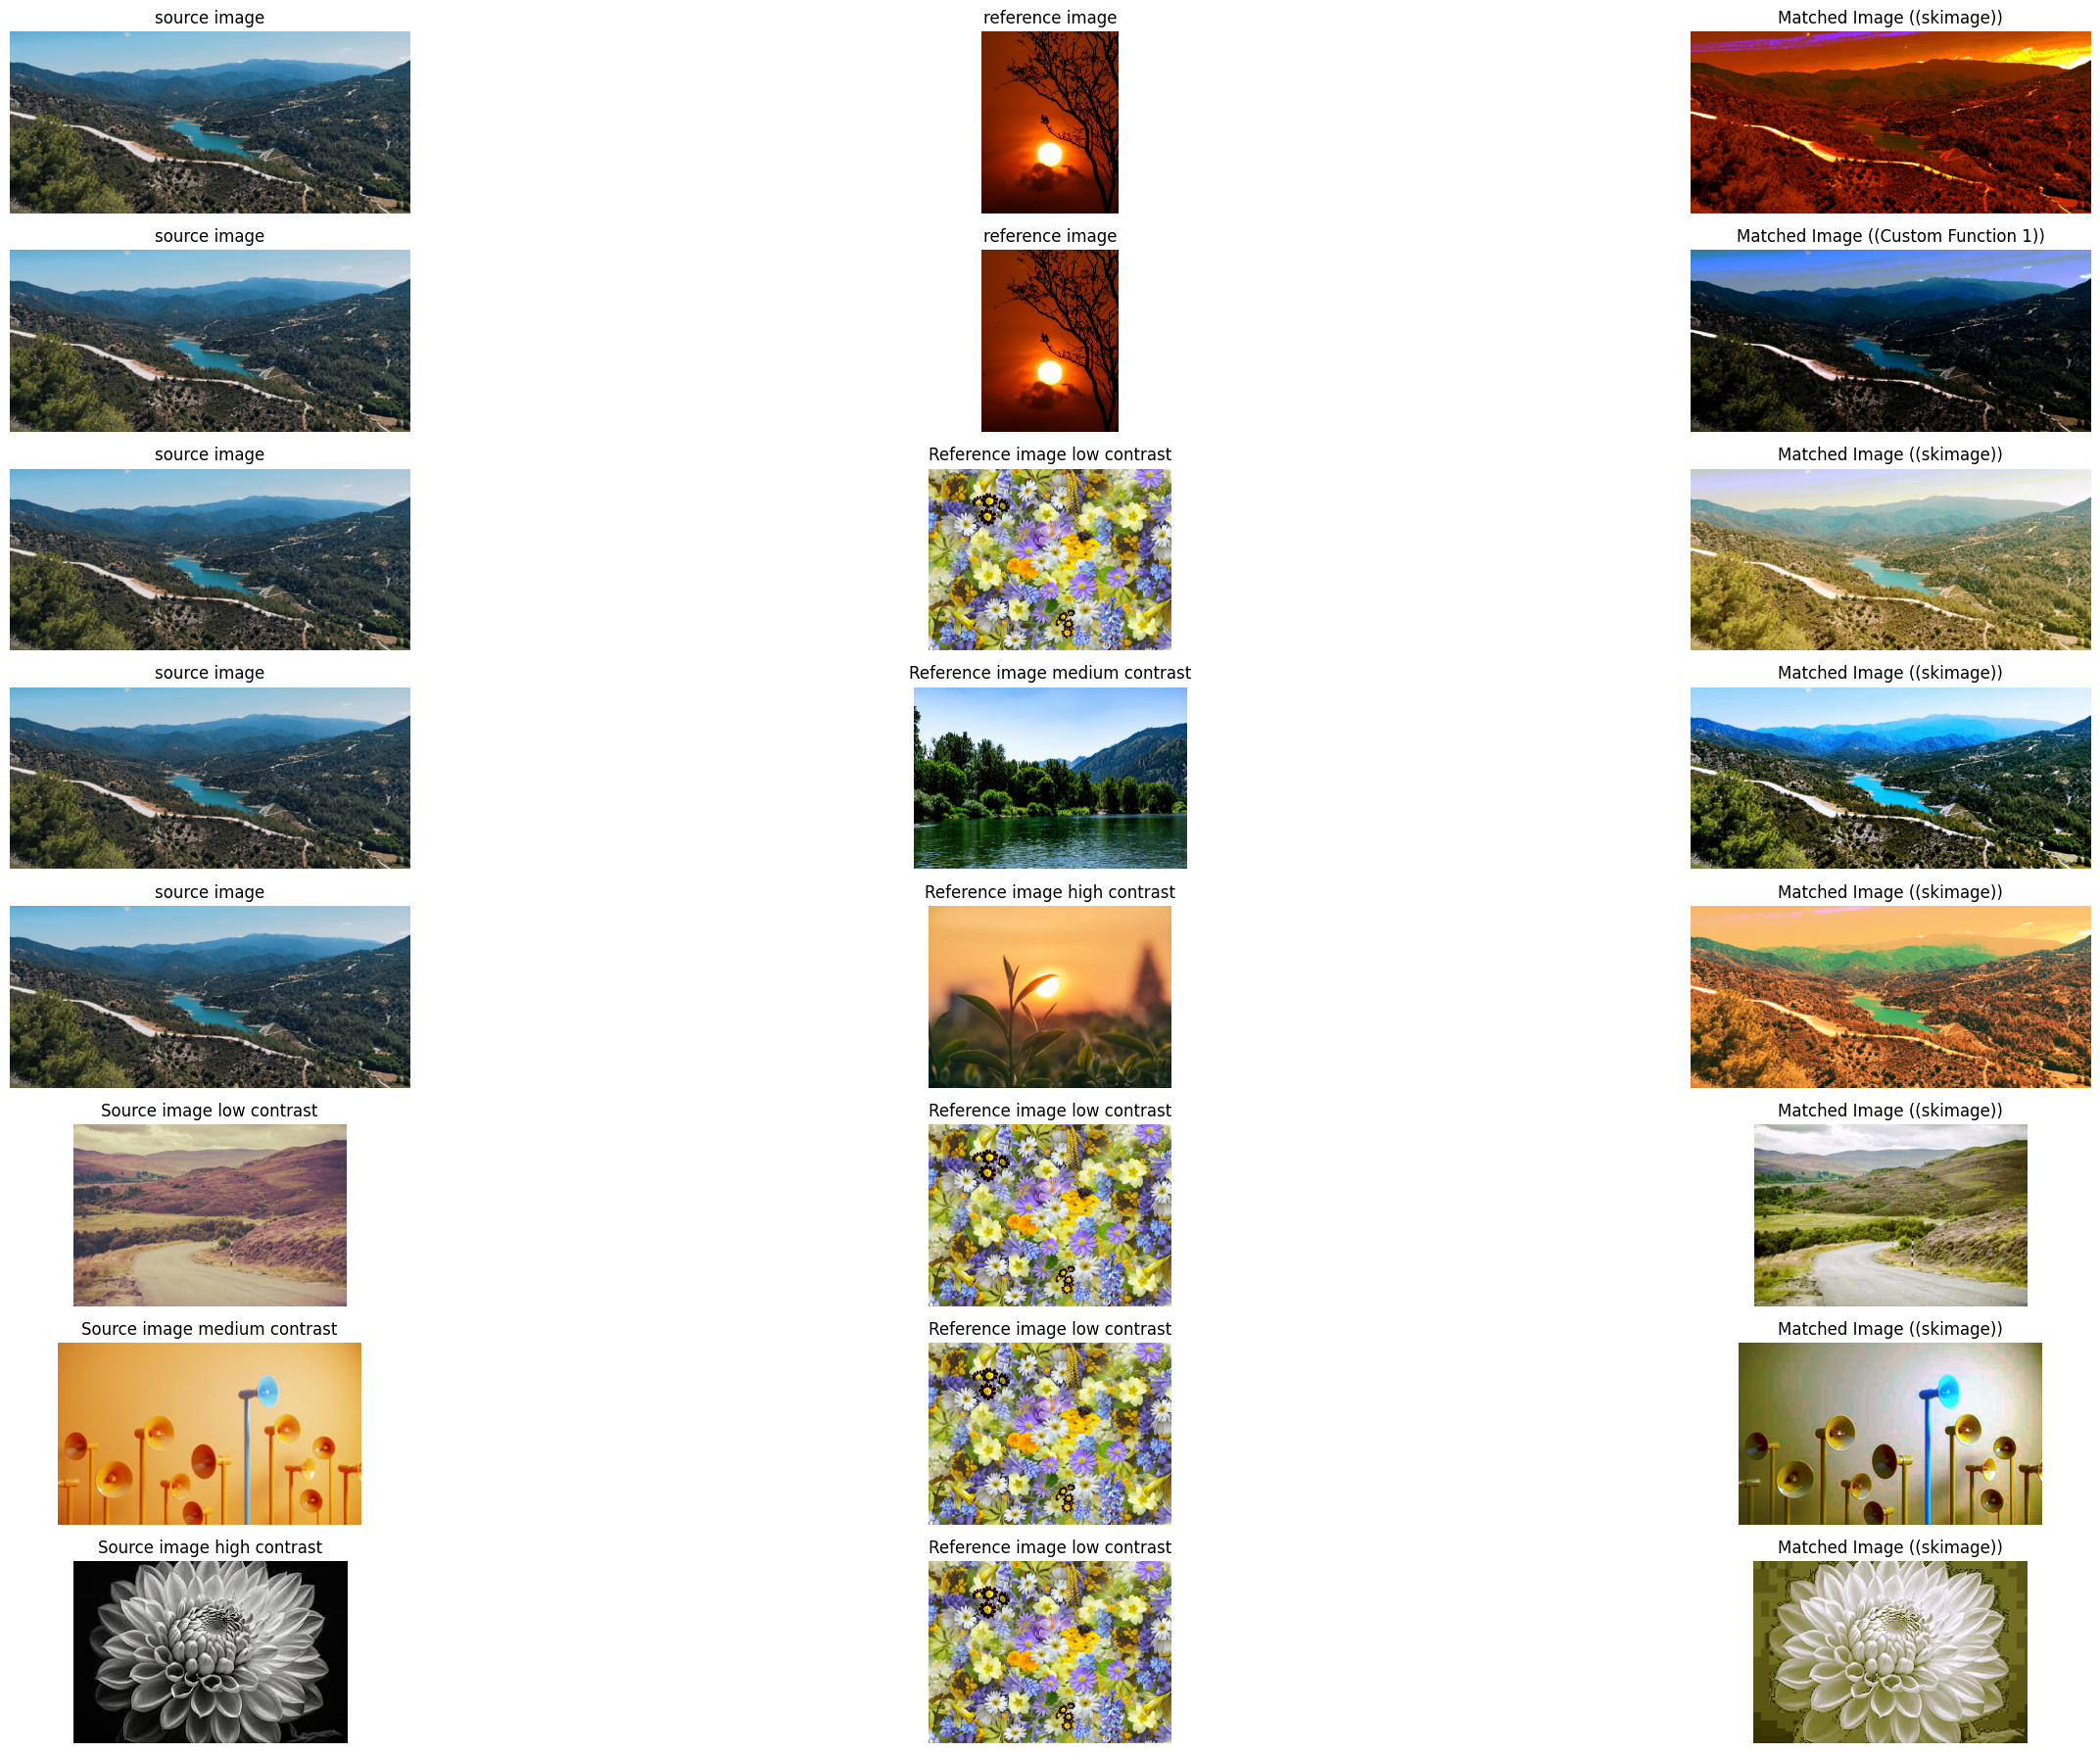

In [181]:
if __name__=="__main__":
    main()